<a href="https://colab.research.google.com/github/Aliraza13793/husky/blob/master/Gym_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install --q -U langchain_google_genai langchain_core langgraph

In [2]:
from google.colab import userdata
GOOGLE_API_KEY_1 = userdata.get('GOOGLE_API_KEY_1')

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import ChatGoogleGenerativeAI
# Function to handle user input and provide Ali gym information

def aligym(help: str) -> str:
    """
    A function to provide information about Ali Gym services and general health guidance.

    This function processes user queries about Ali Gym and returns relevant information based on
    keyword matching. It can provide details about gym services, contact information, fitness advice,
    and general health tips.

    Parameters
    ----------
    help : str
        A string containing the user's query. The function processes this string case-insensitively
        to match keywords and provide appropriate responses.

    Returns
    -------
    str
        A response string containing the requested information. Responses include:
        - Contact information for Ali Gym
        - Exercise guidance for beginners
        - Energy boosting tips
        - Nutritional advice
        - Fitness activity suggestions
        - Sleep improvement recommendations
        - Mental health and stress management tips
        - Hydration guidelines
        - Physical activity recommendations
        - Work break strategies
        - Gym timing information
        - Fee structure details
        - Owner information
        - Gym address
        - Basic healthcare tips

    Examples
    --------
    >>> aligym("Contact Number")
    "Contact Number of Ali gym is : 0322 4200458 olso contact on wtsapp"

    >>> aligym("gym timing")
    "our gym timing is Moring:6:am to 9:00am Evening timing: 4:00pm to 9pm."

    >>> aligym("fee of gym")
    "Our Gym fees with Trainer is 10000/- per Month and Witout Trainer fee is 7000/-."

    Notes
    -----
    - All input strings are converted to lowercase before processing
    - Keywords are matched using 'in' operator for flexible matching
    - The function provides general health and fitness advice along with gym-specific information
    - For unmatched queries, it's recommended to add an else clause to handle undefined cases


    """
    help = help.lower()

    # General health information
    if "water" in help and "daily" in help:
        return ("A good rule of thumb is to drink about 8 cups (2 liters) of water a day. "
                "However, this can vary based on your activity level, the climate, and your overall health. "
                "If you're thirsty, drink more water!")

    elif "exercise" in help and "beginners" in help:
        return ("If you're new to exercise, start with simple activities like walking, light jogging, or yoga. "
                "You can also try bodyweight exercises like squats, lunges, and push-ups. "
                "Aim for at least 30 minutes of moderate activity most days of the week.")

    elif "boost" in help and "energy" in help:
        return ("To boost your energy naturally, eat well-balanced meals with whole foods, stay hydrated, "
                "and aim for 7-9 hours of sleep per night. Taking short breaks during the day to stretch or walk can also help.")

    elif "nutrition" in help:
        return ("For a balanced diet, try to include plenty of fruits, vegetables, whole grains, lean proteins, "
                "and healthy fats. A simple meal could be grilled chicken with quinoa and steamed vegetables, or a salad with mixed greens, nuts, and avocado.")

    elif "fitness" in help:
        return ("Simple fitness activities like walking, cycling, swimming, or yoga are great for all fitness levels. "
                "Start slow and gradually increase the intensity. Remember to include warm-ups and cool-downs in your routine.")

    elif "sleep" in help:
        return ("To improve your sleep quality, establish a regular sleep schedule, avoid screen time before bed, "
                "and make your bedroom a relaxing environment (dark, cool, and quiet). Aim for 7-9 hours of sleep each night.")

    elif "mental health" in help:
        return ("Managing stress is important for mental well-being. Try relaxation techniques like deep breathing, meditation, or mindfulness. "
                "Taking breaks during the day, staying active, and spending time with loved ones can also help manage stress.")

    elif "hydrate" in help:
        return ("Staying hydrated is crucial for overall health. Drink water throughout the day, especially if you're active or in a hot environment. "
                "Aim to drink at least 8 cups of water daily, and more if you're exercising.")

    elif "physical activity" in help:
        return ("Regular physical activity is essential for maintaining health. You don't have to do intense workouts—walking, stretching, and other light activities can be beneficial. "
                "Try to get at least 150 minutes of moderate activity each week.")

    elif "breaks" in help and "work" in help:
        return ("Taking regular breaks is important to avoid burnout. Try the 'Pomodoro technique': work for 25 minutes, then take a 5-minute break. "
                "Stretch, take a walk, or do something you enjoy during your breaks to refresh your mind and body.")
    elif "owner"  in help:
        return ("ali raza akram is the owner of aligym.")

    elif "timing"  in help:
        return ("timing is 06.am to 9am")

    elif "fee"  in help:
        return ("fee of aligym is 10000/-")

    elif "contact"  in help:
        return ("Our Contact Number is  03224200458")

    # Provide general health tips
    elif "basic health care" in help:
        return ("Basic health care includes a few simple habits that can significantly improve your well-being. "
                "Here are some tips:\n"
                "1. Stay hydrated by drinking water throughout the day.\n"
                "2. Get at least 30 minutes of exercise most days of the week.\n"
                "3. Eat a balanced diet with a variety of fruits, vegetables, and whole grains.\n"
                "4. Aim for 7-9 hours of sleep each night.\n"
                "5. Practice stress management techniques like deep breathing or mindfulness.\n"
                "6. Take regular breaks, especially if you're working long hours.\n"
                "Remember, these are just general tips. Always consult with a healthcare professional for personalized advice.")

    else:
      return ("Sorry, I couldn't understand your query.Let me connect you to a human assistant for this question!")



llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GOOGLE_API_KEY_1)
llm_with_tools = llm.bind_tools([aligym])

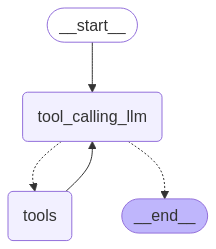

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage


sys_msg = SystemMessage(content="You are a helpful assistant for providing help or information about Ali gym , Use in the conditional_edge to route to the ToolNode if the last message has tool calls. Otherwise, route to the end..")

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# building a graph
builder: StateGraph = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", assistant)
builder.add_node("tools", ToolNode([aligym]))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest msg (result) from assistant is a tool call -> tools  condt routes to tools
    # if the latest msg  result from assistant is a not a tool calling -> tools cont routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")
graph: CompiledStateGraph = builder.compile()

#view
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory: MemorySaver = MemorySaver()
react_graph_memory: CompiledStateGraph = builder.compile(checkpointer=memory)

In [7]:
config = {"configurable": {"thread_id": "1"}}

messages = [HumanMessage(content="What is the contact of ali gym")]
messages = react_graph_memory.invoke({"messages": messages}, config=config)
for n in messages['messages']:
    n.pretty_print()

================================ Human Message =================================

What is the contact of ali gym
================================== Ai Message ==================================
Tool Calls:
  aligym (3473abbe-4ef3-4b90-8df9-0543cde50571)
 Call ID: 3473abbe-4ef3-4b90-8df9-0543cde50571
  Args:
    help: Contact Number
================================= Tool Message =================================
Name: aligym

Our Contact Number is  03224200458
================================== Ai Message ==================================

Contact Number of Ali gym is : 0322 4200458 olso contact on wtsapp
